In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

### Web scraping : https://www.the-numbers.com/movie/budgets/all with Beautiful Soup

In [2]:
url = 'https://www.the-numbers.com/movie/budgets/all'

In [3]:
html = requests.get(url).content 

In [4]:
html

b'<!DOCTYPE html>\r\n<html>\r\n<head>\r\n<!-- Global site tag (gtag.js) - Google Analytics -->\r\n<script async src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>\r\n<script>\r\n  window.dataLayer = window.dataLayer || [];\r\n  function gtag(){dataLayer.push(arguments);}\r\n  gtag(\'js\', new Date());\r\n\r\n  gtag(\'config\', \'UA-1343128-1\');\r\n</script>\r\n<meta http-equiv="PICS-Label" content=\'(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))\'>\r\n<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\r\n<meta name="format-detection" content="telephone=no">   <!-- for apple mobile --> \r\n<meta property="fb:admins" content="521546213" />\r\n\r\n\r\n<meta name="viewport" content="initi

In [5]:
soup = BeautifulSoup(html)


In [6]:
table = soup.select('table')

In [7]:
rows= table[0].find_all('tr')

In [8]:
rows = [row.text.strip().replace('\n\n','\n').split('\n') for row in rows]

In [9]:
data = rows [1:]

In [10]:
df= pd.DataFrame(data, columns = ['Rank','Release Date','Movie','Production Budget','Domestic Gross','Worldwide Gross'])

### Looping through all the pages

In [11]:

df1=pd.DataFrame()
import time
import numpy as np

url= f'https://www.the-numbers.com/movie/budgets/all'
html = requests.get(url).content
soup= BeautifulSoup(html)
table = soup.select('table')
rows= table[0].find_all('tr')
rows = [row.text.strip().replace('\n\n','\n').split('\n') for row in rows]
df1 = df1.append(rows) 
        
for i in np.arange(101,7001,100):
    url= f'https://www.the-numbers.com/movie/budgets/all/{i}'
    html = requests.get(url).content
    soup= BeautifulSoup(html)
    table = soup.select('table')
    rows= table[0].find_all('tr')
    rows = [row.text.strip().replace('\n\n','\n').split('\n') for row in rows]
    df1 = df1.append(rows) 
        
    if i%1000==0:
        time.sleep(2)


//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [12]:
df1

,0,1,2,3,4,5
0,ReleaseDateMovieProductionBudgetDomesticGrossW...,None,None,None,None,None
1,1,"Dec 17, 2009",Avatar,"$425,000,000","$760,507,625","$2,789,705,275"
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,3,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,795,473,000"
4,4,"Apr 22, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,5,"Dec 13, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,6,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,7,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,9,"Nov 13, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


### Minor cleaning: Rename columns, drop rows with NaN values

In [13]:
df1.index = df1[0]

In [14]:
df1.set_index(0, inplace=True)

In [15]:
#rename columns
df1.rename(columns={0:'Rank',
                          1:'Release Date',
                          2:'Movie', 3:'Production Budget', 4:'Domestic Gross',5:'Worldwide Gross'}, 
                 inplace=True)

In [16]:
df1.index.names = ['Index']


In [20]:
df1

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
Index,,,,,
ReleaseDateMovieProductionBudgetDomesticGrossWorldwideGross,None,None,None,None,None
1,"Dec 17, 2009",Avatar,"$425,000,000","$760,507,625","$2,789,705,275"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,795,473,000"
4,"Apr 22, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 13, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"


In [26]:
#delete the rows where index is equal to ReleaseDateMovieProductionBudgetDomesticGrossWorldwideGross

df1 = df1.drop(df1[df1.index=="ReleaseDateMovieProductionBudgetDomesticGrossWorldwideGross"].index) 


In [27]:
df1.shape

(5855, 5)

In [28]:
#change the 'Movie' column format 
df1['Movie']=df1['Movie'].str.strip()

### Movie Dataset from kaggle with information about Director, Actors, Facebook likes, Genres, Release Date

In [29]:
movies=pd.read_csv('/Users/sarahpierre-louis/Downloads/movie_metadata.csv')

In [30]:
#rename 'movie_title' column into 'Movie' to match the other df
movies.rename(columns={'movie_title': 'Movie'}, inplace=True)

In [31]:
#clean the 'Movie' column

movies['Movie']=movies['Movie'].str.strip()

### Merge the 2 datasets

In [32]:
#Merge the 2 df by the 'Movie' column

df2=pd.merge(movies, df1, on='Movie')

In [33]:
df2

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,237000000.0,2009.0,936.0,7.9,1.78,33000,"Dec 17, 2009","$425,000,000","$760,507,625","$2,789,705,275"
1,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,245000000.0,2015.0,393.0,6.8,2.35,85000,"Oct 6, 2015","$300,000,000","$200,074,175","$879,620,923"
2,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,250000000.0,2012.0,23000.0,8.5,2.35,164000,"Jul 19, 2012","$275,000,000","$448,139,099","$1,084,439,099"
3,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,263700000.0,2012.0,632.0,6.6,2.35,24000,"Mar 7, 2012","$275,000,000","$73,058,679","$282,778,100"
4,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,258000000.0,2007.0,11000.0,6.2,2.35,0,"May 4, 2007","$258,000,000","$336,530,303","$894,860,230"
5,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,258000000.0,2007.0,11000.0,6.2,2.35,0,"May 4, 2007","$258,000,000","$336,530,303","$894,860,230"
6,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,260000000.0,2010.0,553.0,7.8,1.85,29000,"Nov 24, 2010","$260,000,000","$200,821,936","$586,477,240"
7,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,250000000.0,2015.0,21000.0,7.5,2.35,118000,"Apr 22, 2015","$330,600,000","$459,005,868","$1,403,013,963"
8,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,250000000.0,2009.0,11000.0,7.5,2.35,10000,"Jul 15, 2009","$250,000,000","$302,089,278","$935,213,767"
9,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,250000000.0,2016.0,4000.0,6.9,2.35,197000,"Mar 23, 2016","$250,000,000","$330,360,194","$867,500,281"


### Basic Information about our dataset

In [34]:
df2.shape

(4547, 32)

In [35]:
# the nb of NaN by column
df2.isna().sum()

color                         15
director_name                 73
num_critic_for_reviews        41
duration                      11
director_facebook_likes       73
actor_3_facebook_likes        16
actor_2_name                   9
actor_1_facebook_likes         6
gross                        727
genres                         0
actor_1_name                   6
Movie                          0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  16
facenumber_in_poster          10
plot_keywords                124
movie_imdb_link                0
num_user_for_reviews          15
language                       9
country                        3
content_rating               214
budget                       377
title_year                    75
actor_2_facebook_likes         9
imdb_score                     0
aspect_ratio                 270
movie_facebook_likes           0
Release Date                   0
Production Budget              0
Domestic G

### Clean the columns : Production Budget, Worldwide Gross, Domestic Gross

In [36]:
#remove the $ sign

df2['Production Budget']= df2['Production Budget'].str.replace('$', '').str.replace(',','')
df2['Domestic Gross']= df2['Domestic Gross'].str.replace('$', '').str.replace(',','')
df2['Worldwide Gross']= df2['Worldwide Gross'].str.replace('$', '').str.replace(',','')

In [37]:
# change the type of the values

df2['Production Budget']= df2['Production Budget'].astype('float64')
df2['Domestic Gross']= df2['Domestic Gross'].astype('float64')
df2['Worldwide Gross']= df2['Worldwide Gross'].astype('float64')


In [38]:
#there are 111 values missing values in 'Release date' and less in 'title_year' so replace 'Unknown' by the value in 'title_year'

df2.loc[(df2['Release Date']=='Unknown') & (df2['title_year']!=0), 'Release Date'] = df2['title_year']
df2

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,237000000.0,2009.0,936.0,7.9,1.78,33000,"Dec 17, 2009",425000000.0,760507625.0,2.789705e+09
1,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,245000000.0,2015.0,393.0,6.8,2.35,85000,"Oct 6, 2015",300000000.0,200074175.0,8.796209e+08
2,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,250000000.0,2012.0,23000.0,8.5,2.35,164000,"Jul 19, 2012",275000000.0,448139099.0,1.084439e+09
3,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,263700000.0,2012.0,632.0,6.6,2.35,24000,"Mar 7, 2012",275000000.0,73058679.0,2.827781e+08
4,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,258000000.0,2007.0,11000.0,6.2,2.35,0,"May 4, 2007",258000000.0,336530303.0,8.948602e+08
5,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,258000000.0,2007.0,11000.0,6.2,2.35,0,"May 4, 2007",258000000.0,336530303.0,8.948602e+08
6,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,260000000.0,2010.0,553.0,7.8,1.85,29000,"Nov 24, 2010",260000000.0,200821936.0,5.864772e+08
7,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,250000000.0,2015.0,21000.0,7.5,2.35,118000,"Apr 22, 2015",330600000.0,459005868.0,1.403014e+09
8,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,250000000.0,2009.0,11000.0,7.5,2.35,10000,"Jul 15, 2009",250000000.0,302089278.0,9.352138e+08
9,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,250000000.0,2016.0,4000.0,6.9,2.35,197000,"Mar 23, 2016",250000000.0,330360194.0,8.675003e+08


### Drop the columns that are irrelevant for our study

In [39]:
df2.drop(['color','gross','budget','title_year','aspect_ratio'], axis=1, inplace=True)

In [40]:
df2.drop(['movie_imdb_link', 'facenumber_in_poster'], axis=1, inplace=True)

### Transform the Release Date column in 2 columns: Month, Year

In [41]:
# separate the Month and Year from the Release Date

df2['Month'], df2['Year'] = df2['Release Date'].str.split(' ', 1).str

In [42]:
df2['Day'], df2['Year']= df2['Year'].str.split(',', 1).str

In [43]:
df2.drop('Release Date', axis=1, inplace=True)

In [44]:
df2.drop('Day',axis=1, inplace=True)

#### Map the months with the corresponding numbers

In [48]:
dict_condition={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8, 'Sep':9, 'Oct':10,'Nov':11,'Dec':12,'Unknown':0}
df2.Month=df2.Month.map(dict_condition)


#### Fill the missing values with 0 for the 2 columns

In [49]:
df2.Month = df2.Month.fillna(0).astype(int)

In [50]:
df2.Year = df2.Year.fillna(0).astype(int)

### Content-rating column: Create new categories to group the ratings

In [51]:
df2.content_rating.value_counts()

R            1939
PG-13        1369
PG            641
Not Rated      96
G              93
Unrated        57
Approved       53
TV-14          21
X              11
TV-MA          11
TV-PG          10
Passed          8
TV-G            7
NC-17           7
GP              5
M               3
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

In [52]:
df2.content_rating = df2.content_rating.str.replace('NC-17','adult')
df2.content_rating = df2.content_rating.str.replace('TV-MA','adult')

In [53]:
df2.content_rating = df2.content_rating.str.replace('M','adult')

In [54]:
df2.content_rating = df2.content_rating.str.replace('X','adult')

In [55]:
df2.content_rating = df2.content_rating.str.replace('Not Rated','0')

In [56]:
df2.content_rating = df2.content_rating.str.replace('R','adult')

In [57]:
df2.content_rating = df2.content_rating.str.replace('TV-G','all')
df2.content_rating = df2.content_rating.str.replace('TV-14','teen')
df2.content_rating = df2.content_rating.str.replace('GP','adult')
df2.content_rating = df2.content_rating.str.replace('Approved','all')
df2.content_rating = df2.content_rating.str.replace('PG-13','teen')

In [58]:
df2.content_rating = df2.content_rating.str.replace('Unrated','0')

In [59]:
df2.content_rating = df2.content_rating.str.replace('Passed','all')

In [60]:
df2.content_rating = df2.content_rating.str.replace('TV-PG','all')

In [61]:
df2.content_rating = df2.content_rating.str.replace('TV-Y7','teen')

In [62]:
df2.content_rating = df2.content_rating.str.replace('TV-Y','all')

In [63]:
df2.content_rating = df2.content_rating.str.replace('PG','all')

In [64]:
df2.content_rating = df2.content_rating.str.replace('G','all')

#### Map the ratings 

In [65]:
dict1 = {'all':1,'teen':2,'adult':3,'0':4}
df2.content_rating=df2.content_rating.map(dict1)
df2.content_rating

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
5       2.0
6       1.0
7       2.0
8       1.0
9       2.0
10      2.0
11      2.0
12      2.0
13      2.0
14      1.0
15      2.0
16      2.0
17      2.0
18      2.0
19      2.0
20      2.0
21      2.0
22      2.0
23      2.0
24      2.0
25      2.0
26      2.0
27      2.0
28      2.0
29      2.0
       ... 
4517    3.0
4518    3.0
4519    4.0
4520    NaN
4521    3.0
4522    NaN
4523    3.0
4524    3.0
4525    NaN
4526    NaN
4527    NaN
4528    3.0
4529    NaN
4530    3.0
4531    NaN
4532    NaN
4533    4.0
4534    3.0
4535    3.0
4536    4.0
4537    NaN
4538    NaN
4539    NaN
4540    NaN
4541    2.0
4542    4.0
4543    3.0
4544    2.0
4545    4.0
4546    NaN
Name: content_rating, Length: 4547, dtype: float64

#### Fill the missing values with 0 

In [66]:
df2.content_rating = df2.content_rating.fillna(0).astype(int)

### Language

In [67]:
#drop "Language" column because English = 97% of the rows
df2.language.value_counts()/df2.shape[0]

English       0.965472
French        0.005498
Hindi         0.005278
Spanish       0.004399
Mandarin      0.002419
Cantonese     0.001539
German        0.001320
Japanese      0.001320
Russian       0.000880
Arabic        0.000880
Korean        0.000660
Italian       0.000660
Polish        0.000440
Dutch         0.000440
Portuguese    0.000440
Aboriginal    0.000440
Dari          0.000440
Persian       0.000440
Zulu          0.000440
Hebrew        0.000440
Swahili       0.000220
Urdu          0.000220
Panjabi       0.000220
Vietnamese    0.000220
Slovenian     0.000220
Icelandic     0.000220
Maya          0.000220
Tamil         0.000220
Telugu        0.000220
Kannada       0.000220
Swedish       0.000220
Hungarian     0.000220
Thai          0.000220
Filipino      0.000220
Norwegian     0.000220
Danish        0.000220
None          0.000220
Aramaic       0.000220
Indonesian    0.000220
Name: language, dtype: float64

In [68]:
df2.drop('language', axis=1, inplace=True)


### Country

In [69]:
df2.country.value_counts()/df2.shape[0]

USA                     0.782494
UK                      0.091709
Canada                  0.023972
France                  0.021333
Germany                 0.018474
Australia               0.011656
India                   0.006158
Spain                   0.005938
New Zealand             0.004399
China                   0.002639
Italy                   0.002419
Ireland                 0.002419
Japan                   0.002419
Hong Kong               0.002419
South Korea             0.001979
Mexico                  0.001979
South Africa            0.001539
Denmark                 0.001320
Belgium                 0.000880
Russia                  0.000880
Thailand                0.000660
Poland                  0.000660
Netherlands             0.000660
Norway                  0.000660
Switzerland             0.000660
Egypt                   0.000440
Brazil                  0.000440
Romania                 0.000440
Czech Republic          0.000440
Iceland                 0.000440
Iran      

### 'Actor 3', 'Plot_keywords' : We decided to drop these columns

In [70]:
df2.drop('plot_keywords', axis=1, inplace=True)

In [71]:
df2.drop(['actor_3_name','actor_3_facebook_likes'], axis=1, inplace=True)

### Genres

In [72]:
df2.genres

0                         Action|Adventure|Fantasy|Sci-Fi
1                               Action|Adventure|Thriller
2                                         Action|Thriller
3                                 Action|Adventure|Sci-Fi
4                                Action|Adventure|Romance
5                                Action|Adventure|Romance
6       Adventure|Animation|Comedy|Family|Fantasy|Musi...
7                                 Action|Adventure|Sci-Fi
8                        Adventure|Family|Fantasy|Mystery
9                                 Action|Adventure|Sci-Fi
10                                Action|Adventure|Sci-Fi
11                                       Action|Adventure
12                               Action|Adventure|Western
13                        Action|Adventure|Fantasy|Sci-Fi
14                        Action|Adventure|Family|Fantasy
15                                Action|Adventure|Sci-Fi
16                                Action|Adventure|Sci-Fi
17            

In [73]:
df2.genres.str.split('|')

0                    [Action, Adventure, Fantasy, Sci-Fi]
1                           [Action, Adventure, Thriller]
2                                      [Action, Thriller]
3                             [Action, Adventure, Sci-Fi]
4                            [Action, Adventure, Romance]
5                            [Action, Adventure, Romance]
6       [Adventure, Animation, Comedy, Family, Fantasy...
7                             [Action, Adventure, Sci-Fi]
8                   [Adventure, Family, Fantasy, Mystery]
9                             [Action, Adventure, Sci-Fi]
10                            [Action, Adventure, Sci-Fi]
11                                    [Action, Adventure]
12                           [Action, Adventure, Western]
13                   [Action, Adventure, Fantasy, Sci-Fi]
14                   [Action, Adventure, Family, Fantasy]
15                            [Action, Adventure, Sci-Fi]
16                            [Action, Adventure, Sci-Fi]
17            

#### Create a list of all the genres

In [75]:
list_of_genre=list({j for i in df2.genres.str.replace(' ','').str.split('|') for j in i})
for i in list_of_genre:
    df2[i]=0

In [76]:
list_of_genre

['Horror',
 'Animation',
 'Film-Noir',
 'Romance',
 'Western',
 'Drama',
 'Biography',
 'Sport',
 'Mystery',
 'Crime',
 'War',
 'Reality-TV',
 'Comedy',
 'Thriller',
 'Short',
 'Game-Show',
 'Fantasy',
 'History',
 'Family',
 'Music',
 'News',
 'Action',
 'Adventure',
 'Documentary',
 'Musical',
 'Sci-Fi']

#### One-Hot Encoding of the Genres

In [77]:
for i in list_of_genre:
    df2[i]=df2.genres.str.contains(i)
df2.sum()

df2 = df2.applymap(lambda x: 1 if x == True else x)
df2 = df2.applymap(lambda x: 0 if x == False else x)
df2


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,Movie,num_voted_users,...,Fantasy,History,Family,Music,News,Action,Adventure,Documentary,Musical,Sci-Fi
0,James Cameron,723.0,178.0,0.0,Joel David Moore,1000.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,...,1,0,0,0,0,1,1,0,0,1
1,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,11000.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,...,0,0,0,0,0,1,1,0,0,0
2,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,27000.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,...,0,0,0,0,0,1,0,0,0,0
3,Andrew Stanton,462.0,132.0,475.0,Samantha Morton,640.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,...,0,0,0,0,0,1,1,0,0,1
4,Sam Raimi,392.0,156.0,0.0,James Franco,24000.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,...,0,0,0,0,0,1,1,0,0,0
5,Sam Raimi,392.0,156.0,0.0,James Franco,24000.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,...,0,0,0,0,0,1,1,0,0,0
6,Nathan Greno,324.0,100.0,15.0,Donna Murphy,799.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,...,1,0,1,1,0,0,1,0,1,0
7,Joss Whedon,635.0,141.0,0.0,Robert Downey Jr.,26000.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,...,0,0,0,0,0,1,1,0,0,1
8,David Yates,375.0,153.0,282.0,Daniel Radcliffe,25000.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,...,1,0,1,0,0,0,1,0,0,0
9,Zack Snyder,673.0,183.0,0.0,Lauren Cohan,15000.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,...,0,0,0,0,0,1,1,0,0,1


# Data Vizualisation

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### When are movies most profitable?

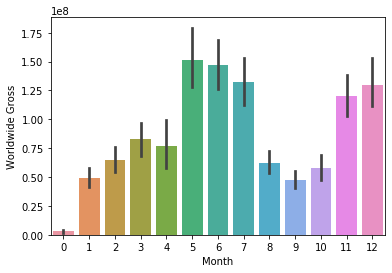

In [181]:
sns.barplot(x="Month", y="Worldwide Gross",data=df2) 

#### What is the relationship between the imdb score and the main actor facebook likes?

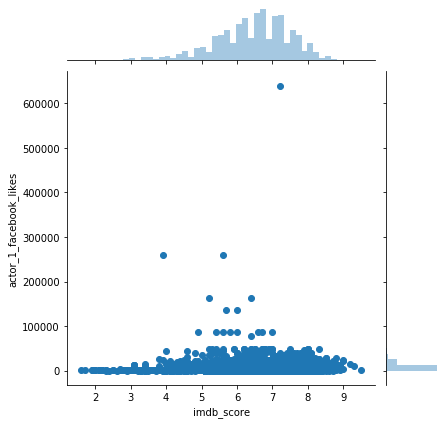

In [220]:
sns.jointplot('imdb_score','actor_1_facebook_likes', data=df2)


In [79]:
%matplotlib qt

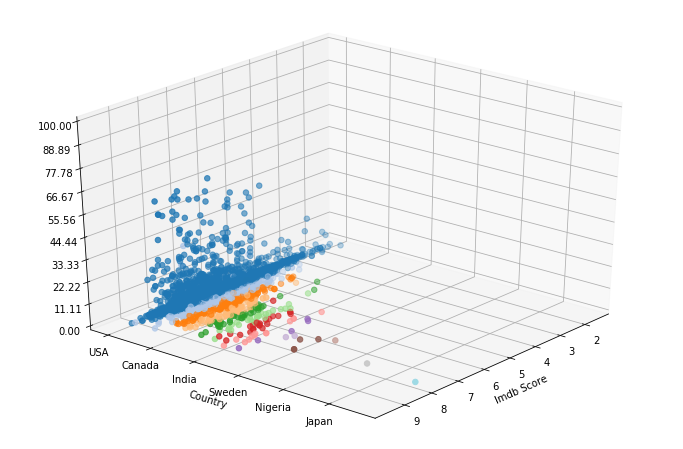

In [82]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import proj3d
import matplotlib.ticker as ticker

country1 = pd.factorize(df2.country)
countryfact = country1[0]

y= df2['Worldwide Gross']
x= df2.imdb_score

# Plot the surface.
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111,projection='3d')

#add the data
ax.scatter(x, y, zs=countryfact,s=30, c=y, cmap = cm.tab20)

#customize the axis
ax.set_zlim(0, 100)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.yaxis.set_ticklabels(['', 'USA', 'Canada','India', 'Sweden', 'Nigeria','Japan'])

plt.xlabel('Imdb Score')
plt.ylabel('Country')

# rotate the axes and update
for angle in range(0, 180):
    ax.view_init(30, 40)

plt.show()

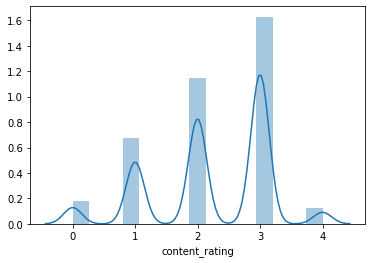

In [185]:
sns.distplot(df2['content_rating'], bins=15)

(<seaborn.axisgrid.JointGrid at 0x1a21aa50b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a21e778d0>)

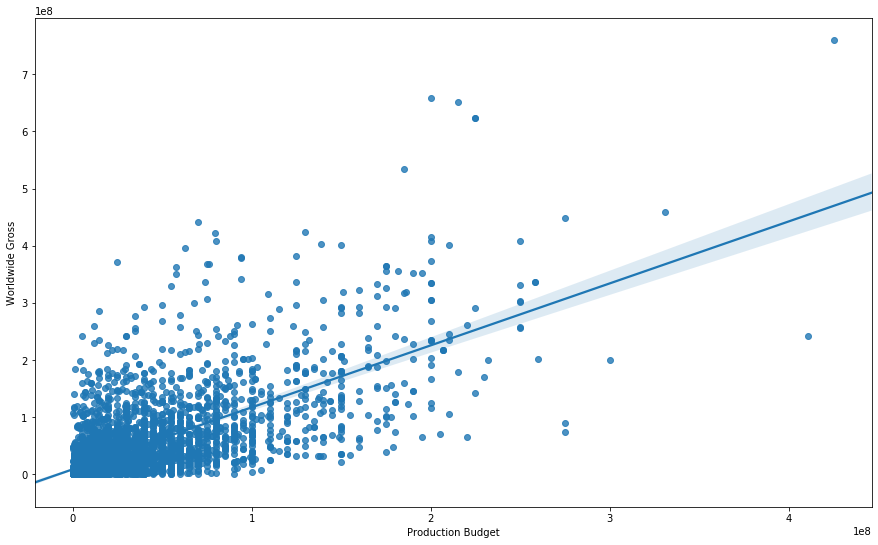

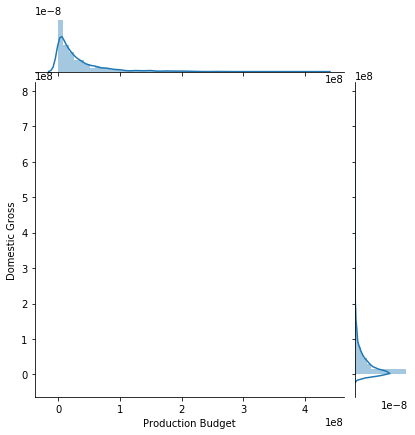

In [186]:
#How has movie budget affected profit?
from matplotlib import pyplot
a4_dims = (15, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Gross')

plot1 = sns.jointplot( x='Production Budget',y="Domestic Gross", kind='reg', data=df2 , ax=ax)
plot1,ax

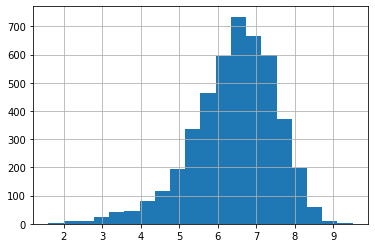

In [193]:
df2.imdb_score.hist(bins=20)

In [194]:
df2['Year'] = df2.Year.fillna(0)
df2['Year'] = df2.Year.astype(int)
df2.dtypes
df3 = df2[df2.Year>2018]


In [195]:
melted=pd.melt(df2, id_vars=['Year'], value_vars=list_of_genre)
melted1 = melted[melted.value==1]


In [196]:
melted=pd.melt(df2, id_vars=['Year','Domestic Gross'], value_vars=list_of_genre)
melted1 = melted[melted.value==1]


In [197]:
melted1.sort_values(by=['Year'])

,Year,Domestic Gross,variable,value
40965,0,0.0,Crime,1
52671,0,0.0,Thriller,1
72335,0,0.0,Mystery,1
54207,0,0.0,Thriller,1
86537,0,0.0,Horror,1
54201,0,0.0,Thriller,1
72636,0,0.0,Mystery,1
88885,0,2119994.0,Family,1
72698,0,0.0,Mystery,1
41010,0,900.0,Crime,1


In [198]:
melted1[['Year']] = melted1[['Year']].fillna(0)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [199]:
melted1['Year'] = melted1['Year'].astype('int')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [200]:
melted1 = melted1.sort_values(by=['Year'])


In [201]:
melted2 = melted1.loc[(melted1.Year>1990) & (melted1.Year<2015)]

In [202]:
melted_df=melted2[['Year','variable','value','Domestic Gross']].groupby(['Year','variable']).agg('sum')
melted_df.reset_index(inplace=True)

melted_df=melted_df.groupby('Year').apply(lambda j : j.sort_values('Domestic Gross',ascending=False)[:3]).drop('Year',axis=1).reset_index(level='Year')

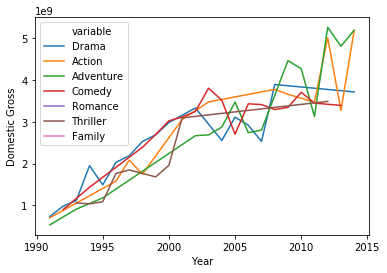

In [203]:
plot1 = sns.lineplot( x='Year',y="Domestic Gross", hue="variable", data=melted_df)


In [204]:
melted2[['Year','variable','value','Domestic Gross']].groupby(['Year','variable']).agg('sum')
melted2=melted2.set_index('Year')
#melted2=melted2.groupby(['variable']).agg('sum')

melted2.head()

,Domestic Gross,variable,value
Year,,,
1991,34416893.0,Music,1
1991,58011485.0,Family,1
1991,113502246.0,Fantasy,1
1991,43218387.0,Thriller,1
1991,14471440.0,Action,1


# Modelling

In [215]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.tools import add_constant


In [216]:
y= df60['imdb_score']
X= df61
X=add_constant(X)
result=sm.OLS(y,X.astype(float)).fit()
result.summary()

NameError: name 'df60' is not defined

# VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
X=add_constant(df6)
X1=X[X.columns[X.columns!='imdb_score']]

In [217]:
pd.Series([vif(X1.values,i) for i in range(X1.shape[1])], index=X1.columns)

NameError: name 'X1' is not defined

In [218]:
df6.drop('cast_total_facebook_likes', axis=1, inplace=True)

NameError: name 'df6' is not defined

In [219]:
df6.columns
df7=df6[['num_critic_for_reviews','num_voted_users','Production Budget' ,'Year', 'Month']]


NameError: name 'df6' is not defined

# RFE

In [220]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.tools.tools import add_constant

In [221]:
model=LinearRegression()

In [222]:
rfe=RFE(model,5)

In [223]:
rfe=rfe.fit(X,y)

NameError: name 'X' is not defined

In [ ]:
print(rfe.support_)

In [224]:
X.columns[rfe.support_] 

NameError: name 'X' is not defined

In [225]:
print(rfe.ranking_)

AttributeError: 'RFE' object has no attribute 'ranking_'

In [226]:
X_new=X[X.columns[rfe.support_]]

NameError: name 'X' is not defined

In [227]:
import statsmodels.regression.linear_model as sm
from statsmodels.tools.tools import add_constant

In [228]:
X_new = add_constant(X_new)
results = sm.OLS(y,X_new).fit()
results.summary()

NameError: name 'X_new' is not defined

# RFE non concluant --> R2=0.1

In [229]:
df5.head()

NameError: name 'df5' is not defined

In [230]:
df2.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,Movie,num_voted_users,...,History,Western,Film-Noir,Horror,Short,Drama,Romance,War,Sport,Adventure
0,James Cameron,723.0,178.0,0.0,Joel David Moore,1000.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,...,0,0,0,0,0,0,0,0,0,1
1,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,11000.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,...,0,0,0,0,0,0,0,0,0,1
2,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,27000.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,...,0,0,0,0,0,0,0,0,0,0
3,Andrew Stanton,462.0,132.0,475.0,Samantha Morton,640.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,...,0,0,0,0,0,0,0,0,0,1
4,Sam Raimi,392.0,156.0,0.0,James Franco,24000.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,...,0,0,0,0,0,0,1,0,0,1


In [231]:
df2.drop('imdb_score_2', axis=1, inplace=True)

KeyError: "['imdb_score_2'] not found in axis"

In [232]:
df2.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,Movie,num_voted_users,...,History,Western,Film-Noir,Horror,Short,Drama,Romance,War,Sport,Adventure
0,James Cameron,723.0,178.0,0.0,Joel David Moore,1000.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,...,0,0,0,0,0,0,0,0,0,1
1,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,11000.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,...,0,0,0,0,0,0,0,0,0,1
2,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,27000.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,...,0,0,0,0,0,0,0,0,0,0
3,Andrew Stanton,462.0,132.0,475.0,Samantha Morton,640.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,...,0,0,0,0,0,0,0,0,0,1
4,Sam Raimi,392.0,156.0,0.0,James Franco,24000.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,...,0,0,0,0,0,0,1,0,0,1


In [233]:
df2.columns

Index([            'director_name',    'num_critic_for_reviews',
                        'duration',   'director_facebook_likes',
                    'actor_2_name',    'actor_1_facebook_likes',
                          'genres',              'actor_1_name',
                           'Movie',           'num_voted_users',
       'cast_total_facebook_likes',      'num_user_for_reviews',
                         'country',            'content_rating',
          'actor_2_facebook_likes',                'imdb_score',
            'movie_facebook_likes',         'Production Budget',
                  'Domestic Gross',           'Worldwide Gross',
                           'Month',                      'Year',
                                 0,                           1,
                                 2,                           3,
                                 4,                           5,
                                 6,                           7,
                        '

# Standardization df2

In [234]:
df6=df2._get_numeric_data()
df6.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,content_rating,actor_2_facebook_likes,imdb_score,...,History,Western,Film-Noir,Horror,Short,Drama,Romance,War,Sport,Adventure
0,723.0,178.0,0.0,1000.0,886204,4834,3054.0,2,936.0,7.9,...,0,0,0,0,0,0,0,0,0,1
1,602.0,148.0,0.0,11000.0,275868,11700,994.0,2,393.0,6.8,...,0,0,0,0,0,0,0,0,0,1
2,813.0,164.0,22000.0,27000.0,1144337,106759,2701.0,2,23000.0,8.5,...,0,0,0,0,0,0,0,0,0,0
3,462.0,132.0,475.0,640.0,212204,1873,738.0,2,632.0,6.6,...,0,0,0,0,0,0,0,0,0,1
4,392.0,156.0,0.0,24000.0,383056,46055,1902.0,2,11000.0,6.2,...,0,0,0,0,0,0,1,0,0,1


In [235]:
df6.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_1_facebook_likes', 'num_voted_users',
       'cast_total_facebook_likes', 'num_user_for_reviews', 'content_rating',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes',
       'Production Budget', 'Domestic Gross', 'Worldwide Gross', 'Month',
       'Year', 'Thriller', 'Sci-Fi', 'Comedy', 'Fantasy', 'Family', 'Action',
       'Animation', 'Documentary', 'Biography', 'Music', 'Mystery', 'Crime',
       'News', 'Musical', 'Reality-TV', 'Game-Show', 'History', 'Western',
       'Film-Noir', 'Horror', 'Short', 'Drama', 'Romance', 'War', 'Sport',
       'Adventure'],
      dtype='object')

In [236]:
df6.drop(['num_user_for_reviews','Biography', 'Reality-TV', 'Fantasy', 'Drama', 'Music',
       'Sci-Fi', 'Animation', 'Thriller', 'Crime', 'Action', 'Short', 'Sport',
       'Documentary', 'Romance', 'Western', 'Adventure', 'Family', 'Horror',
       'Game-Show', 'News', 'Comedy', 'War', 'History', 'Musical', 'Film-Noir',
       'Mystery'], axis=1, inplace=True)

In [237]:
df6.shape

(4557, 15)

In [238]:
df6.iloc[:,:16].isna().sum().sum()

140

In [239]:
df6=df6.dropna()

In [240]:
df6.iloc[:,:16].isna().sum().sum()

0

In [241]:
pd.Series(np.where(df6.movie_facebook_likes==0, 0.0001,df6.movie_facebook_likes)).apply(np.log).hist()

In [242]:
df6.movie_facebook_likes.value_counts()

0         1935
1000        93
10000       79
11000       67
12000       63
15000       54
13000       47
2000        46
16000       42
14000       40
3000        39
19000       36
18000       35
17000       31
24000       30
21000       26
23000       26
26000       23
29000       23
20000       23
5000        22
7000        20
25000       18
27000       16
22000       16
4000        15
39000       15
37000       15
33000       14
31000       14
          ... 
849          1
857          1
865          1
978          1
982          1
990          1
617          1
541          1
545          1
79           1
565          1
71           1
67           1
63           1
55           1
605          1
609          1
621          1
998          1
27           1
645          1
101000       1
96000        1
153000       1
665          1
669          1
673          1
112000       1
79000        1
58           1
Name: movie_facebook_likes, Length: 806, dtype: int64

### Normalization : for columns where you have 0 - minmaxscaler, for money - np.log, for rest - standardscaler

In [243]:
df6.movie_facebook_likes=df6[['movie_facebook_likes']].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [244]:
df6.movie_facebook_likes.hist()

In [245]:
df6['Production Budget']=df6[['Production Budget']].apply(np.log)

In [246]:
df6['Production Budget'].hist()

In [247]:
df6['num_critic_for_reviews'].min()

1.0

In [248]:
df6[['num_critic_for_reviews']]=df6[['num_critic_for_reviews']].apply(np.log)

In [249]:
df6.num_critic_for_reviews.hist()

In [250]:
df6.loc[df6['Worldwide Gross']==0]
df6 = df6.drop(df6[df6['Worldwide Gross']==0].index)

In [251]:
df6['Worldwide Gross']=df6[['Worldwide Gross']].apply(np.log)

In [252]:
df6['Worldwide Gross'].hist()

In [253]:
df6.director_facebook_likes=df6[['director_facebook_likes']].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [254]:
df6.director_facebook_likes.hist()

In [255]:
df6.actor_1_facebook_likes=df6[['actor_1_facebook_likes']].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [256]:
df6.actor_1_facebook_likes.hist()

In [257]:
df6.actor_2_facebook_likes=df6[['actor_2_facebook_likes']].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [258]:
df6.actor_2_facebook_likes.hist()

In [259]:
df6.duration.hist()

In [260]:
df6['duration']=df6[['duration']].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [261]:
df6.imdb_score.hist()

In [262]:
df6['imdb_score']=df6[['imdb_score']].apply(lambda x: (x-x.mean())/x.std())

In [263]:
df6.imdb_score.hist()

In [264]:
df6.content_rating.hist()

In [265]:
df6['content_rating']=df6[['content_rating']].apply(lambda x: (x-x.mean())/x.std())

In [266]:
df6['Month']=df6[['Month']].apply(lambda x: (x-x.mean())/x.std())
df6['Year']=df6[['Year']].apply(lambda x: (x-x.mean())/x.std())

In [267]:
df6['Month'].hist()

In [268]:
df6['Year'].hist()

In [269]:
df60=df2._get_numeric_data()
df61=df60[['Reality-TV', 'Music', 'Animation', 'Romance', 'Family','Game-Show', 'Comedy', 'Musical']]
df61.columns

Index(['Reality-TV', 'Music', 'Animation', 'Romance', 'Family', 'Game-Show',
       'Comedy', 'Musical'],
      dtype='object')

In [270]:
df2.columns

Index([            'director_name',    'num_critic_for_reviews',
                        'duration',   'director_facebook_likes',
                    'actor_2_name',    'actor_1_facebook_likes',
                          'genres',              'actor_1_name',
                           'Movie',           'num_voted_users',
       'cast_total_facebook_likes',      'num_user_for_reviews',
                         'country',            'content_rating',
          'actor_2_facebook_likes',                'imdb_score',
            'movie_facebook_likes',         'Production Budget',
                  'Domestic Gross',           'Worldwide Gross',
                           'Month',                      'Year',
                                 0,                           1,
                                 2,                           3,
                                 4,                           5,
                                 6,                           7,
                        '